**Analysis of the parameters for the calculation of the Hurst Exponent**

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 6

import numpy as np
# import random

In [3]:
# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
np.random.seed(7)
gbm = np.log(np.cumsum(np.random.randn(100000))+1000)
mr = np.log(np.random.randn(100000)+1000)
tr = np.log(np.cumsum(np.random.randn(100000)+1)+1000)

In [4]:
def hurst(ts):
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(2, 100)

	# Calculate the array of the variances of the lagged differences
	tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = np.polyfit(np.log(lags), np.log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0

In [20]:
hurst(gbm) # Calculate the Hurst Exponent of the full random serie.

0.51137160748733612

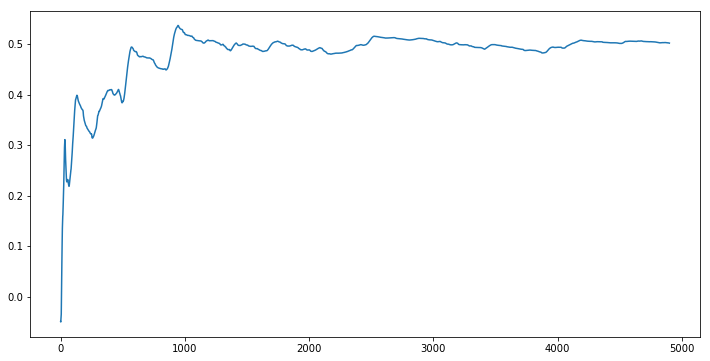

In [10]:
hurst_gbm=[hurst(gbm[:i]) for i in range(101,5000,1)] #Calculate the Hurst Exponent of a range of random serie slices and plot.

plt.plot(hurst_gbm)

In [11]:
hurst(mr) # Calculate the Hurst Exponent of the full mean reverse serie.

0.00018774986166239667

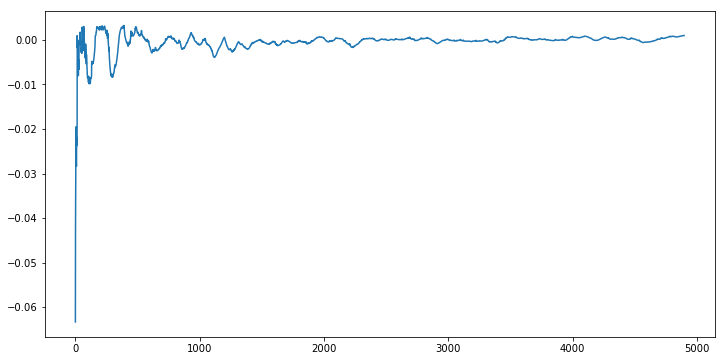

In [12]:
hurst_mr=[hurst(mr[:i]) for i in range(101,5000,1)] #Calculate the Hurst Exponent of a range of mean reverse serie slices and plot.

plt.plot(hurst_mr)

In [13]:
hurst(tr) # Calculate the Hurst Exponent of the full trend serie.

0.95562324916295827

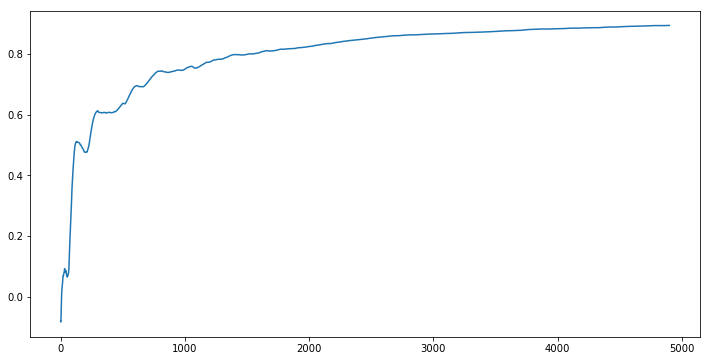

In [14]:
hurst_tr=[hurst(tr[:i]) for i in range(101,5000,1)] #Calculate the Hurst Exponent of a range of trend serie slices and plot.

plt.plot(hurst_tr)

**We can verify that in all three series, the value of the Hurst Exponent is not stable and close to the expected until the sample segment taken for its calculation is at least 2000 observations.**

In [15]:
def bt_hurst(ts):
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(2, len(ts)/2)

	# Calculate the array of the variances of the lagged differences
	tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = np.polyfit(np.log(lags), np.log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0

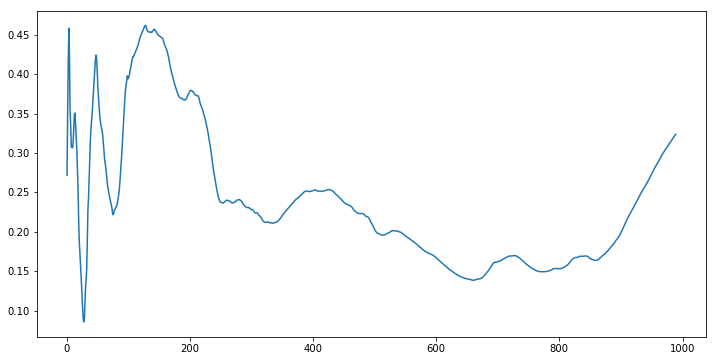

In [16]:
bt_hurst_gbm=[bt_hurst(gbm[:i]) for i in range(101,10000,10)] #Calculate the Hurst Exponent of a range of random serie slices and plot.

plt.plot(bt_hurst_gbm)

**Using a like Backtrader method to calculate the Hurst Exponent, taking range between 2 and the half of the sample, the Hurst Exponent is more unstable and far of the expected value. Even if we take samples of larger size (period).**

In [17]:
def mod_hurst(ts,start=2, end=100): # Mod method with selectable lags range.
    
    
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(start, end)

	# Calculate the array of the variances of the lagged differences
	tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = np.polyfit(np.log(lags), np.log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0

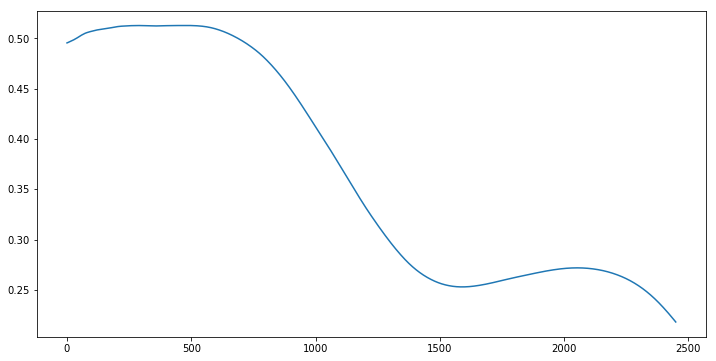

In [18]:
mod_hurst_gbm=[mod_hurst(gbm[:5000], end=i) for i in range(50,2500,1)] #Calculate the Hurst Exponent of a range of Gometric Brownian Motion serie slice with a range of diferents lag ends and plot.

plt.plot(mod_hurst_gbm)

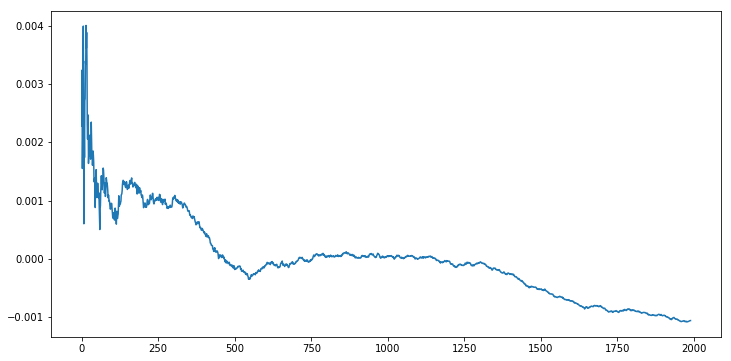

In [19]:
mod_hurst_mr=[mod_hurst(mr[:5000], end=i) for i in range(10,2000,1)] #Calculate the Hurst Exponent of a range of Mean-Reverting serie slice with a range of diferents lag ends and plot.

plt.plot(mod_hurst_mr)

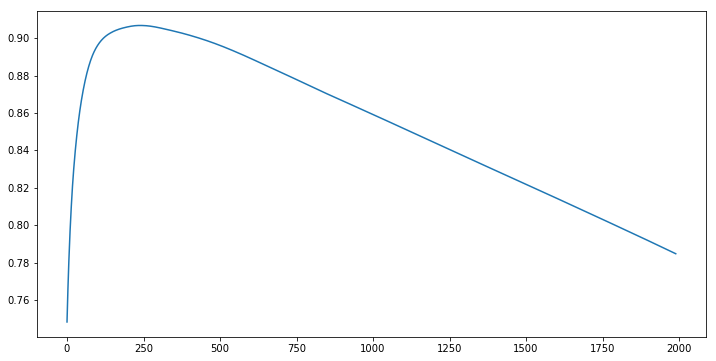

In [20]:
mod_hurst_tr=[mod_hurst(tr[:5000], end=i) for i in range(10,2000,1)] #Calculate the Hurst Exponent of a range of Trending serie slice with a range of diferents lag ends and plot.

plt.plot(mod_hurst_tr)

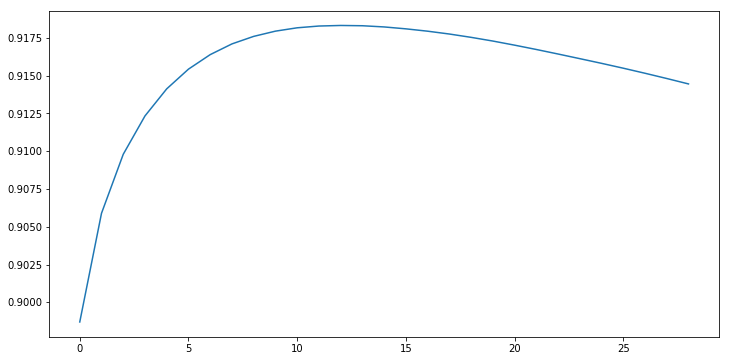

In [21]:
mod_hurst_tr=[mod_hurst(tr[:5000], end=300, start=i) for i in range(1,30,1)] #Calculate the Hurst Exponent of a range of Trending serie with a range of lag starts slices and plot.

plt.plot(mod_hurst_tr)

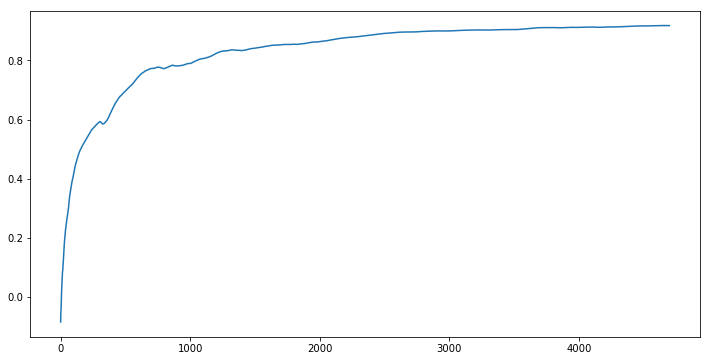

In [22]:
mod_hurst_tr=[mod_hurst(tr[:i], end=300, start=10) for i in range(301,5000,1)] #Calculate the Hurst Exponent of a range of Trending serie slices  with the selected lags and plot.

plt.plot(mod_hurst_tr)

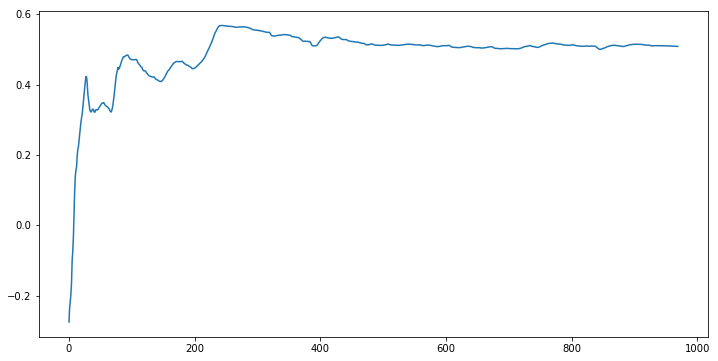

In [23]:
mod_hurst_gbm=[mod_hurst(gbm[:i], end=300, start=10) for i in range(301,10000,10)] #Calculate the Hurst Exponent of a range of GBM serie slices  with the selected lags and plot.

plt.plot(mod_hurst_gbm)

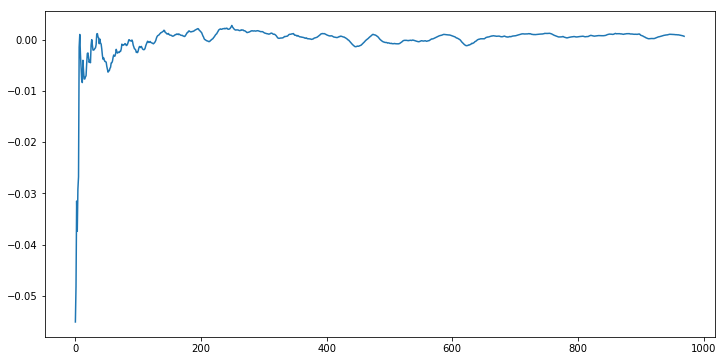

In [24]:
mod_hurst_mr=[mod_hurst(mr[:i], end=300, start=10) for i in range(301,10000,10)] #Calculate the Hurst Exponent of a range of Mean-Reverting serie slices  with the selected lags and plot.

plt.plot(mod_hurst_mr)

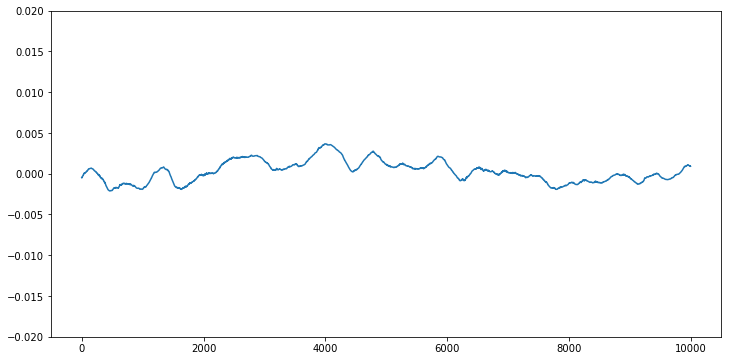

In [25]:
rolling_hurst=[mod_hurst(mr[i:i+5000], end=500, start=10) for i in range (0, 10000)] #Calculate rolling Hurst Exponent  of Mean-Reverting serie slices  with the selected lags and plot.

plt.ylim(-0.02,0.02)
plt.plot(rolling_hurst)

In [26]:
import pandas as pd  # Load a serie of EUR/USD with 10 minutes timeframe, more of 45,000 bars

eurusd=pd.read_csv('EUR_USD_10 mins.csv')

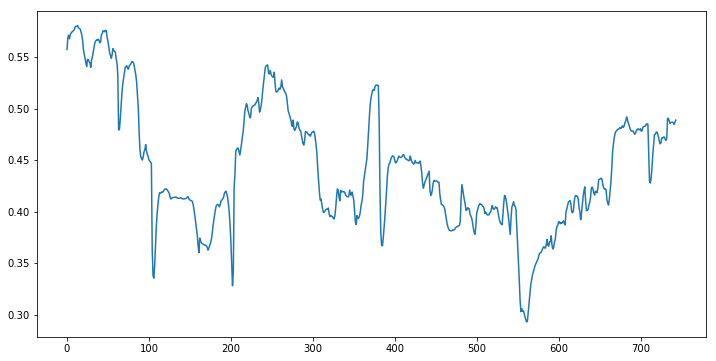

In [42]:
# Calculate rolling Hurst Exponent of EUR/USD serie with a period of 5000, and lag range (10, 500) and a frequency of 50 bars

rolling_hurst=[mod_hurst(eurusd.close[i:i+5000], end=500, start=10) for i in range (0,37200, 50)]

plt.plot(rolling_hurst)

In [63]:
# from backtrader import PeriodN


# __all__ = ['HurstExponent', 'Hurst']

from numpy import asarray, log10, polyfit, sqrt, std, subtract

import backtrader as bt

class HurstExponent_mod(bt.indicators.PeriodN):
    '''
    References:
      - https://www.quantopian.com/posts/hurst-exponent
      - https://www.quantopian.com/posts/some-code-from-ernie-chans-new-book-implemented-in-python
   Interpretation of the results
      1. Geometric random walk (H=0.5)
      2. Mean-reverting series (H<0.5)
      3. Trending Series (H>0.5)
    '''
    frompackages = (
        ('numpy', ('asarray', 'log10', 'polyfit', 'sqrt', 'std', 'subtract')),
    )

    alias = ('Hurst_mod',)
    lines = ('hurst',)
    params = (('period', 2000), ('lag_start', 10), ('lag_end', 500),)

    def __init__(self):
        super(HurstExponent_mod, self).__init__()
        # Prepare the lags array
        self.lags = asarray(range(self.p.lag_start, self.p.lag_end))
        self.log10lags = log10(self.lags)

    def next(self):
        # Fetch the data
        ts = asarray(self.data.get(size=self.p.period))

        # Calculate the array of the variances of the lagged differences
        tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in self.lags]

        # Use a linear fit to estimate the Hurst Exponent
        poly = polyfit(self.log10lags, log10(tau), 1)

        # Return the Hurst exponent from the polyfit output
        self.lines.hurst[0] = poly[0] * 2.0

**Although it is a rough analysis, we check that only with a period of more than 2000 bars the Hurst Exponent is reliable. And range of the lags should be approximated to (10, 500)**

/home/argante/anaconda2/envs/keratina/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


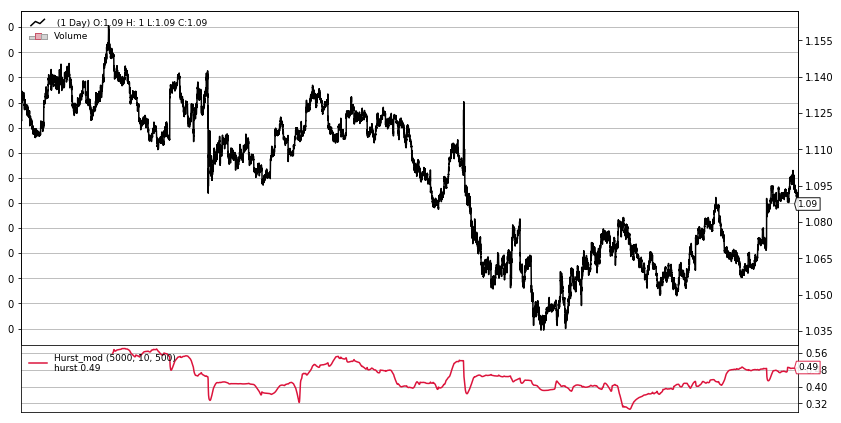

In [64]:
from __future__ import (absolute_import, division, print_function,
                       unicode_literals)

import datetime 
import backtrader as bt
import pandas as pd
from numpy import *

class HurstST(bt.Strategy):
   params = (
   )

   def __init__(self):
       # Three Hurst Exponents with diferent periods
       hurst_1 = Hurst_mod(period=5000)


   def next(self):
       pass


if __name__ == '__main__':

   cerebro = bt.Cerebro()
  
   reindex=['open','high','low','close']
   
   eurusd_data=eurusd.reindex_axis(reindex, axis=1)
   
   eurusd_data.index=pd.to_datetime(eurusd_data.index)

   # Pass the syntectic dataframe to the backtrader datafeed and add it to the cerebro
   data = bt.feeds.PandasDirectData(dataname=eurusd_data,
                                    volume=None,
                                    openinterest=None
                                    )

   cerebro.adddata(data)

   cerebro.addstrategy(HurstST)

   cerebro.run(stdstats=False)

   cerebro.plot()